In [11]:
import pandas as pd


## life time MDD:
# input_file1 = "out02_img_file_info_mdd_tms_response.csv"
# out_file_prefix = 'life_time_mdd_'

## current MDD:
input_file1 = "out02_img_file_info_current_mdd_tms_response.csv"
out_file_prefix = 'current_mdd_'



# input_file2 = "out02_img_file_info_phq_tms_response.csv"
input_file3 = "out02_img_file_info_nthc_tms_response.csv"

subject_info = ["subject_id", "site"]
# subject_info = ["file_dir", "file_name", "subject_id"]

roi_cols = ["FSL_R_Amy_thr40", 
            "ROI_R_Amy_Com_MNI",
            "FIRST_R_amyg_small",
            "ROI_B_Amy_Com_MNI",
            "FSL_L_Amy_thr40",
            "FIRST_B_amyg_small",
            "FSL_B_Amy_thr40",
            "ROI_L_Amy_Com_MNI",
            "FIRST_L_amyg_small"]

data1 = pd.read_csv(input_file1)
# data2 = pd.read_csv(input_file2)
data3 = pd.read_csv(input_file3)

In [12]:

# data_all = pd.concat([data1[subject_info + roi_cols], 
#                       data2[subject_info + roi_cols], 
#                       data3[subject_info + roi_cols]],
#                      keys = ['mdd', 'phq', 'nthc'])

data_all = pd.concat([data1[subject_info + roi_cols], 
                      data3[subject_info + roi_cols]],
                     keys = ['mdd', 'nthc'])

data_all.reset_index(inplace = True, level = 0)
data_all.rename(columns = {'level_0': 'group'}, inplace = True)
data_all


,group,subject_id,site,FSL_R_Amy_thr40,ROI_R_Amy_Com_MNI,FIRST_R_amyg_small,ROI_B_Amy_Com_MNI,FSL_L_Amy_thr40,FIRST_B_amyg_small,FSL_B_Amy_thr40,ROI_L_Amy_Com_MNI,FIRST_L_amyg_small
0,mdd,3086,L_pMFG,-0.654121,-0.416947,-0.692253,-0.393486,-0.062504,-0.499196,-0.375819,-0.372316,-0.286281
1,mdd,3086,L_aMFG,0.039315,0.004902,0.050515,0.184007,0.246165,0.179610,0.136619,0.345625,0.321984
2,mdd,3086,R_M1,-0.265910,-0.446969,-0.227517,-0.688573,-0.787206,-0.533118,-0.511133,-0.906589,-0.870152
3,mdd,3045,L_pMFG,-0.291359,-0.258455,-0.263665,-0.442800,-0.610598,-0.424722,-0.441532,-0.609146,-0.602345
4,mdd,3045,L_aMFG,-0.360724,-0.531440,-0.254973,-0.262635,-0.343072,-0.258972,-0.352420,-0.020075,-0.263383
...,...,...,...,...,...,...,...,...,...,...,...,...
125,nthc,1108,R_M1,-0.362811,-0.329261,-0.354299,-0.328008,-0.504170,-0.392541,-0.429308,-0.326878,-0.434715
126,nthc,1068,R_M1,-0.127820,0.067308,-0.227763,0.381460,0.456773,0.141677,0.147178,0.664940,0.549116
127,nthc,1024,R_M1,-0.482517,-0.408466,-0.390370,-0.146074,0.029981,-0.196623,-0.241433,0.090700,0.017052
128,nthc,1053,R_M1,-0.349042,-0.357322,-0.406532,-0.389374,-0.635262,-0.508069,-0.483683,-0.418296,-0.620049


In [13]:
plot_data = pd.melt(data_all, id_vars=["subject_id", "group", "site"], value_vars=roi_cols, 
                    var_name="ROI", value_name="tms_response")
plot_dataplot_data

,subject_id,group,site,ROI,tms_response
0,3086,mdd,L_pMFG,FSL_R_Amy_thr40,-0.654121
1,3086,mdd,L_aMFG,FSL_R_Amy_thr40,0.039315
2,3086,mdd,R_M1,FSL_R_Amy_thr40,-0.265910
3,3045,mdd,L_pMFG,FSL_R_Amy_thr40,-0.291359
4,3045,mdd,L_aMFG,FSL_R_Amy_thr40,-0.360724
...,...,...,...,...,...
1363,1108,nthc,R_M1,FIRST_L_amyg_small,-0.434715
1364,1068,nthc,R_M1,FIRST_L_amyg_small,0.549116
1365,1024,nthc,R_M1,FIRST_L_amyg_small,0.017052
1366,1053,nthc,R_M1,FIRST_L_amyg_small,-0.620049


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

mcolors.CSS4_COLORS

a4_dims = (12, 8)
plot_x_order = [
                "FSL_R_Amy_thr40", 
                "FSL_L_Amy_thr40",
                "FSL_B_Amy_thr40",
                "FIRST_R_amyg_small",
                "FIRST_L_amyg_small",
                "FIRST_B_amyg_small",
                "ROI_R_Amy_Com_MNI",
                "ROI_L_Amy_Com_MNI",
                "ROI_B_Amy_Com_MNI",
               ]

# colors = [sns.xkcd_rgb["black"]] + sns.color_palette("husl", len(roi_cols)).as_hex()
# colors = colors[1::2] + colors[2::2] 
colors = [mcolors.CSS4_COLORS['dimgray'], 
#           mcolors.CSS4_COLORS['darkgrey'],
          mcolors.CSS4_COLORS['darkgrey'],
         ]

swarm_colors = [mcolors.CSS4_COLORS['black'], 
                mcolors.CSS4_COLORS['black'],
#                 mcolors.CSS4_COLORS['darkgray'],
               ]


def make_plot(plot_data, ylabel):
    # group_label = ['mdd', 'phq', 'nthc']
    group_label = ['HC', 'MDD']

    fig, ax = plt.subplots(figsize=a4_dims, dpi=300)

    sns.swarmplot(y = 'tms_response', x = "ROI", data = plot_data, 
                  hue = 'group', hue_order = ['nthc', 'mdd'],
                  order=plot_x_order,
                  dodge=True, ax = ax, 
                  facecolors='none',
                  edgecolor = "black",
                  palette = swarm_colors, 
                  alpha = .25, size=4)

    sns.barplot(y = 'tms_response', x = "ROI", data = plot_data, 
                hue = 'group', hue_order = ['nthc', 'mdd'],
                order=plot_x_order, 
    #             errorbar=('ci', 95),
                errorbar = 'se',
                palette = colors, ax = ax)

    # sns.boxplot(y = ylabel, x = "ROI", data = plot_data, hue = 'group', 
    #             order=plot_x_order,
    #             palette = colors, notch = True, ax = ax)



    # for i,artist in enumerate(ax.artists):
    #     # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    #     col = artist.get_facecolor()
    #     artist.set_edgecolor(col)
    #     artist.set_facecolor('None')

    #     # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    #     # Loop over them here, and use the same colour as above
    #     for j in range(i*6,i*6+6):
    #         line = ax.lines[j]
    #         line.set_color(col)
    #         line.set_mfc(col)
    #         line.set_mec(col)


    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[2:], group_label, frameon = False, ncol = 2)

    # When creating the legend, only use the first two elements
    # to effectively remove the first/last n.
    # c = ax.collections
    # ax.legend(c, #the last n handles are for the legend. this is strange [-n:] does not work but [n:] works...
    #            group_label, 
    #            borderaxespad = 0., 
    #            loc = 'right', 
    #            columnspacing = 1.2,
    #            frameon = False, markerscale = 3, handlelength = .1,
    #            prop = {'size': 15}, title = '', bbox_to_anchor=(1, 1), ncol=2)

    # sns.boxplot(data=df,x="site",y="tms_site_response",dodge=True,showfliers=False,
                # showbox=True,linewidth=0.8,color = "w");


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.set_xlim([-1, len(roi_cols)])
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Group");
    plt.xticks(rotation = 45)
    
    return fig


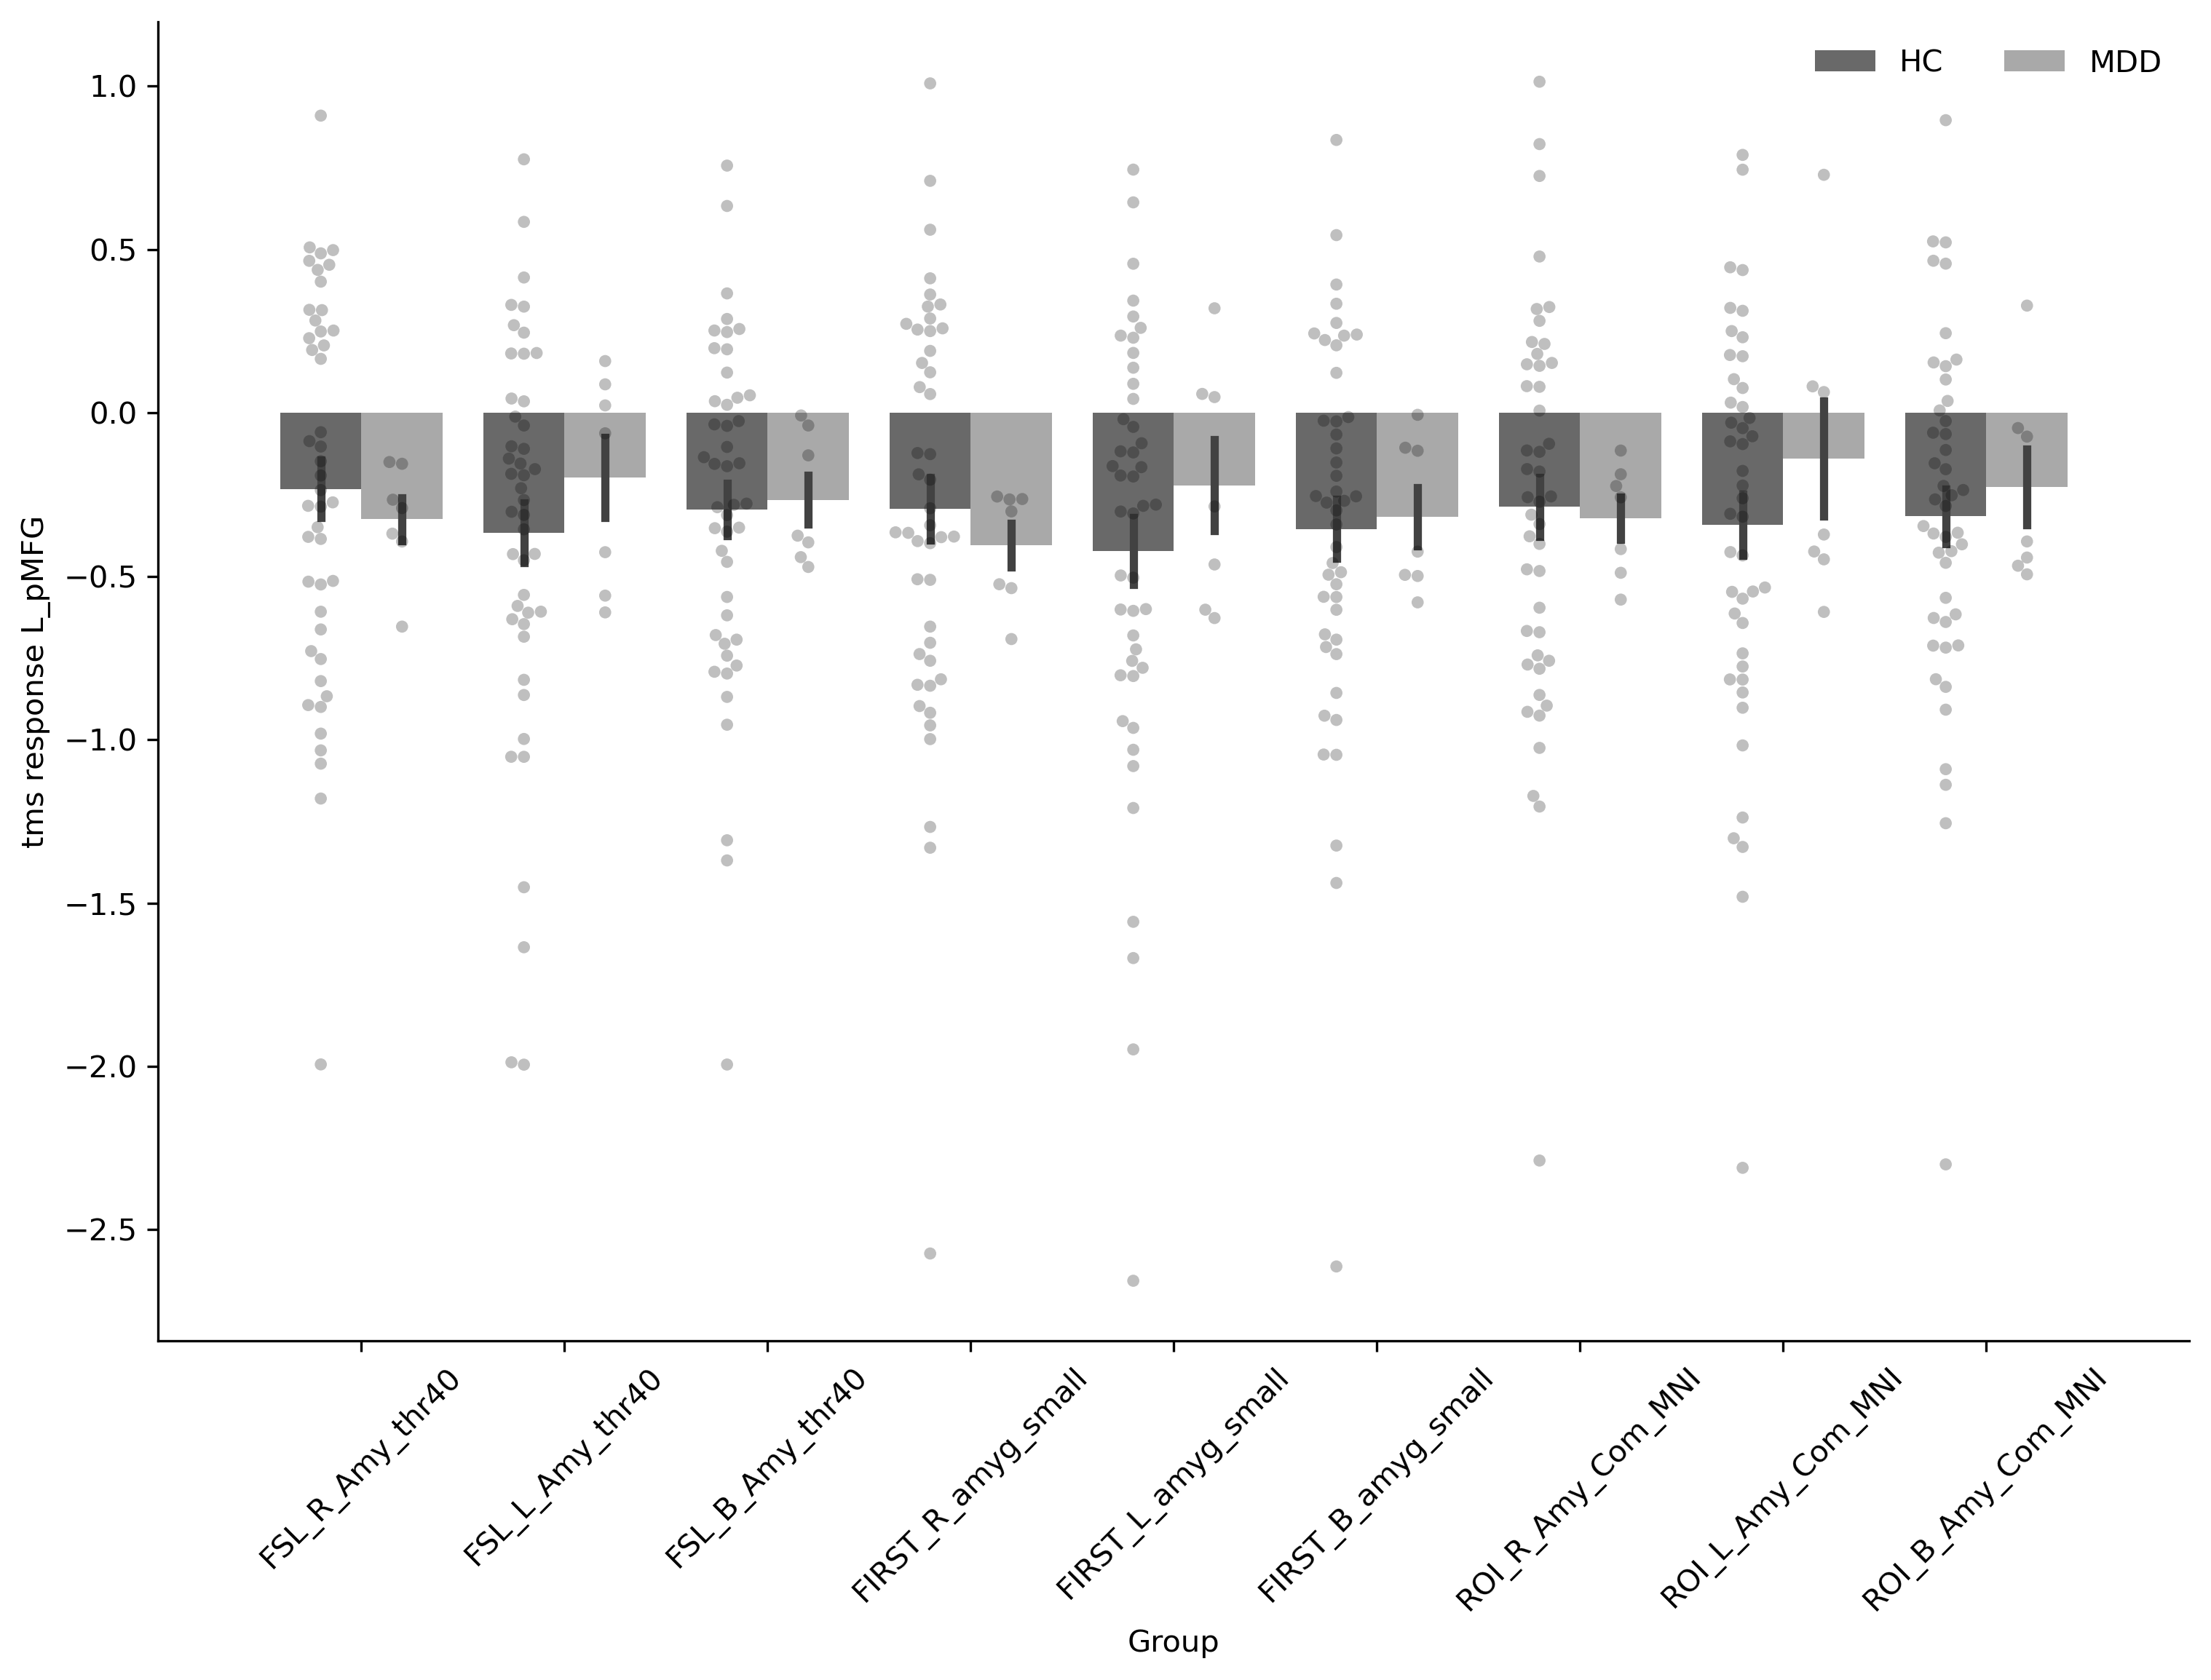

In [16]:

ylabel = "tms response L_pMFG"
plot_data1 = plot_data.loc[plot_data['site']=="L_pMFG", :]
fig = make_plot(plot_data1, ylabel)
fig.savefig('out03_' + out_file_prefix + ylabel + '.png')


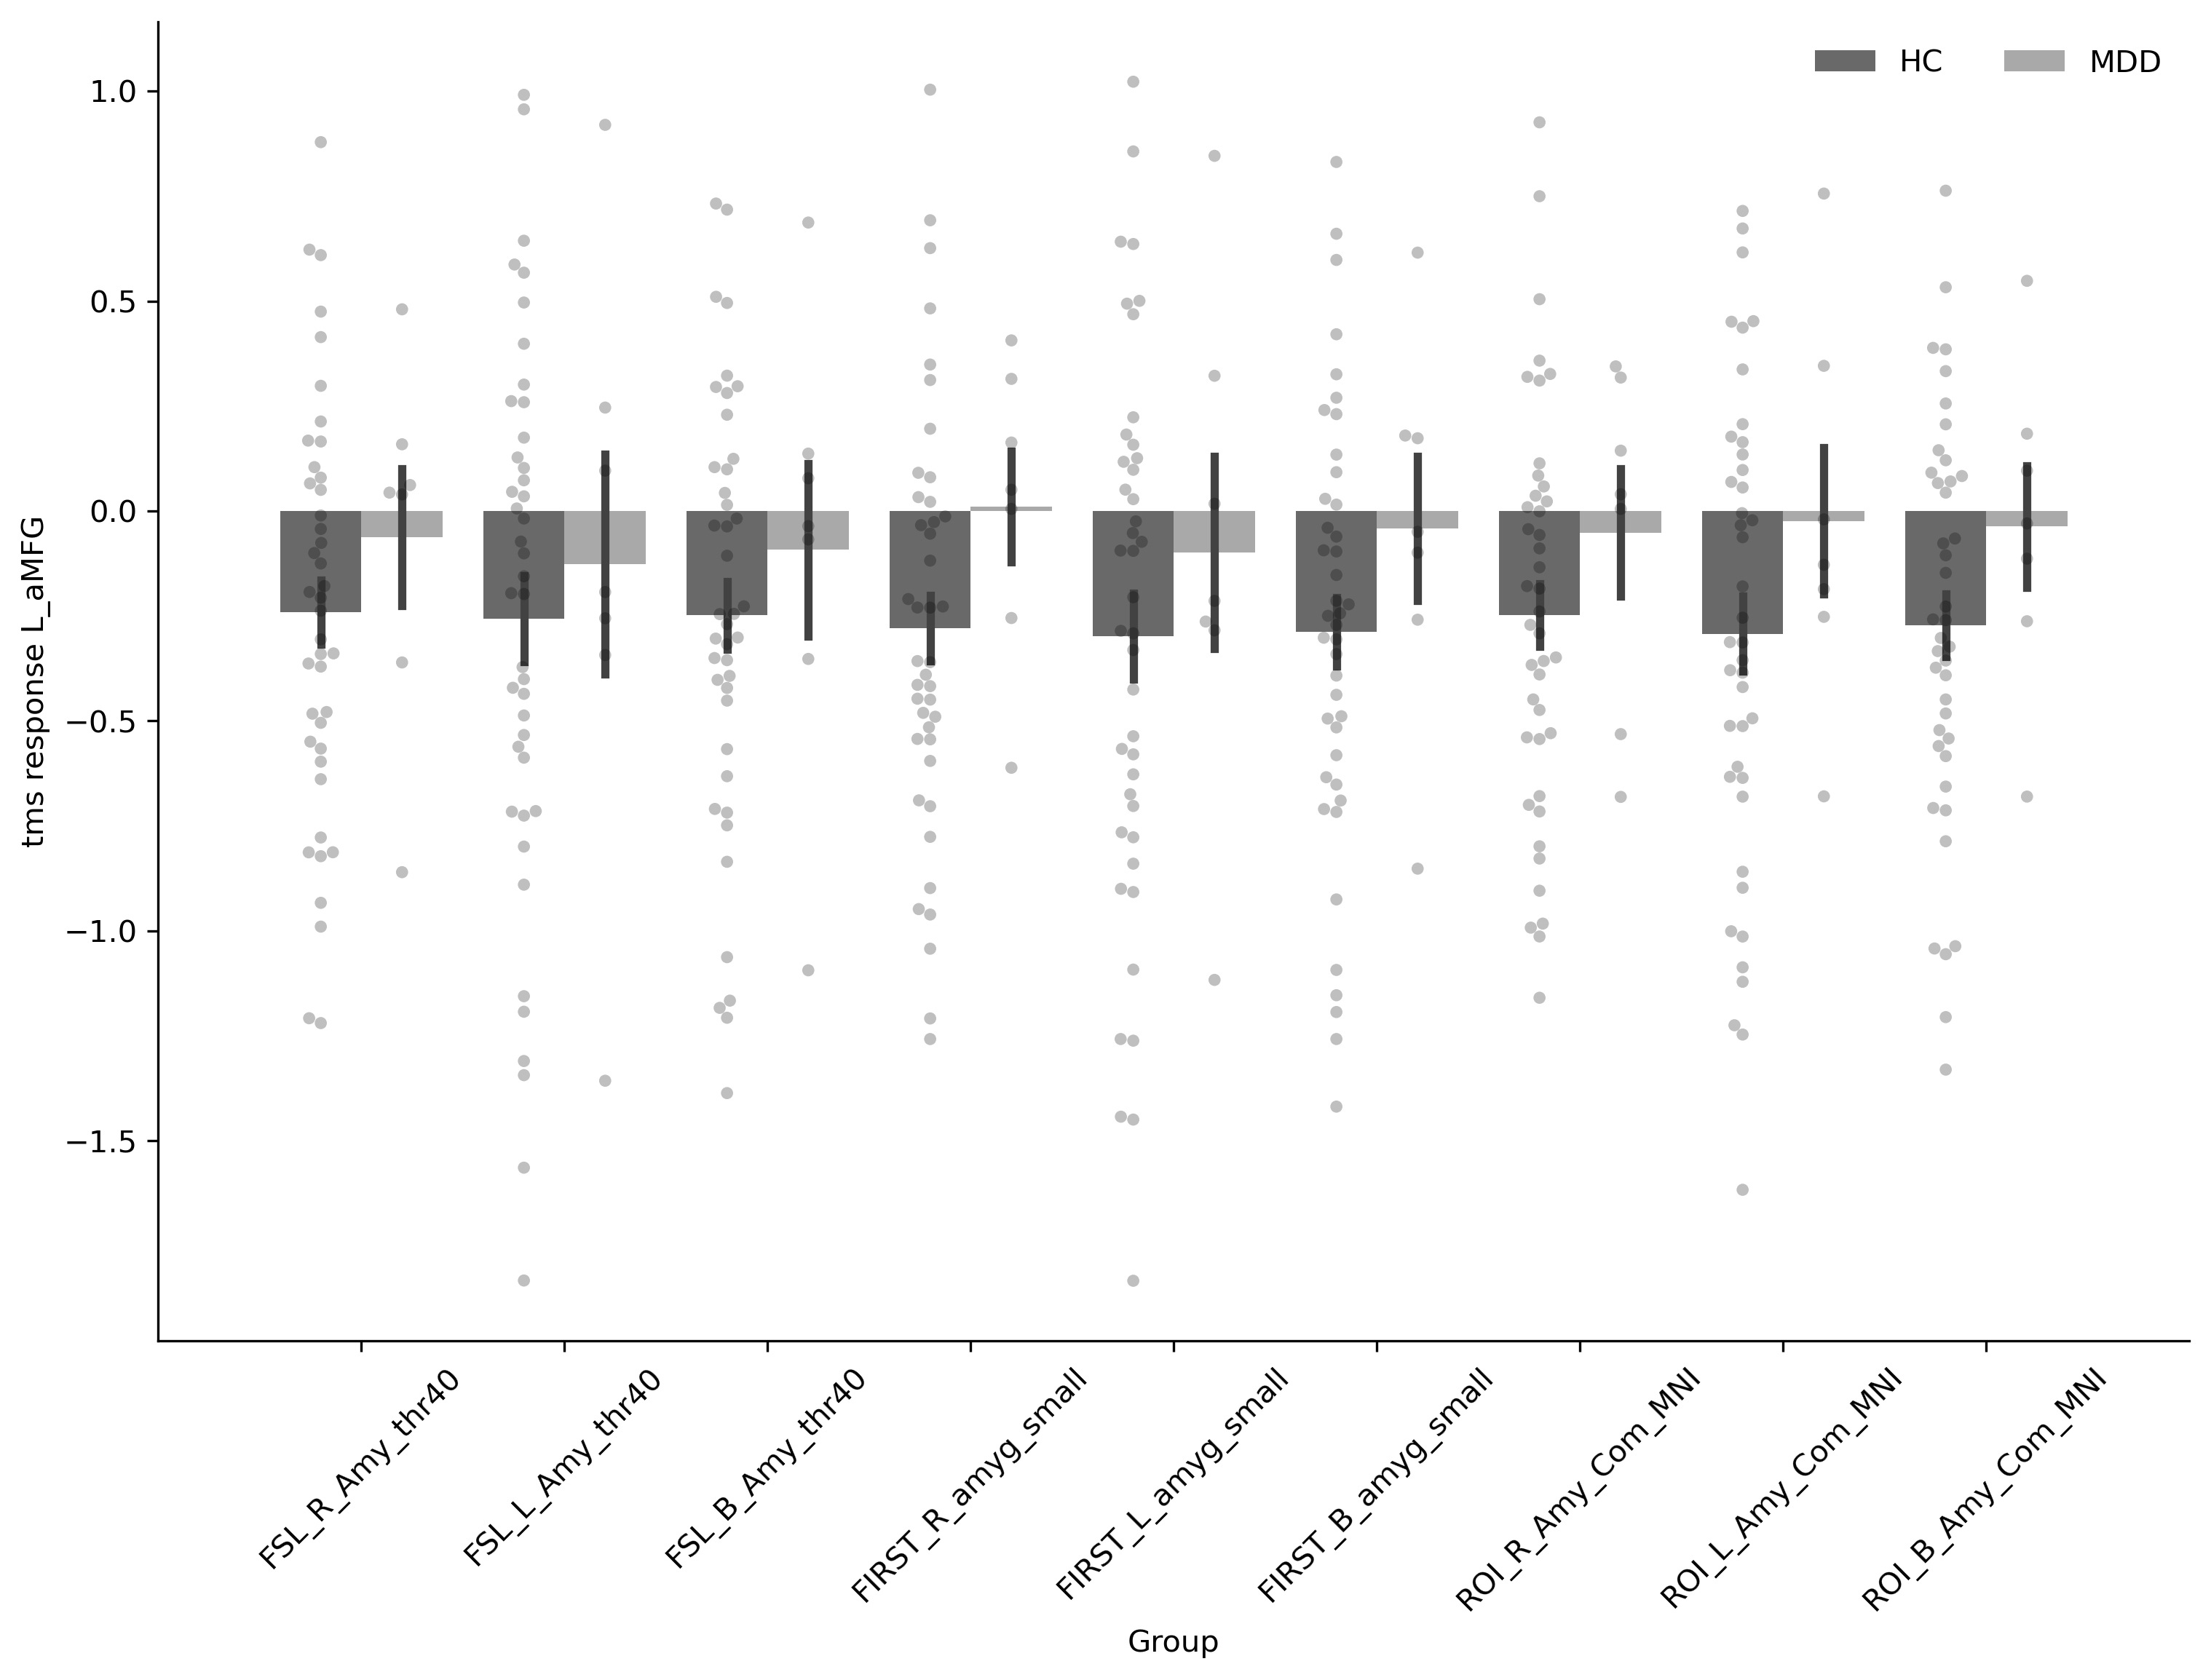

In [17]:
ylabel = "tms response L_aMFG"
plot_data1 = plot_data.loc[plot_data['site']=="L_aMFG", :]
fig = make_plot(plot_data1, ylabel)
fig.savefig('out03_' + out_file_prefix + ylabel + '.png')


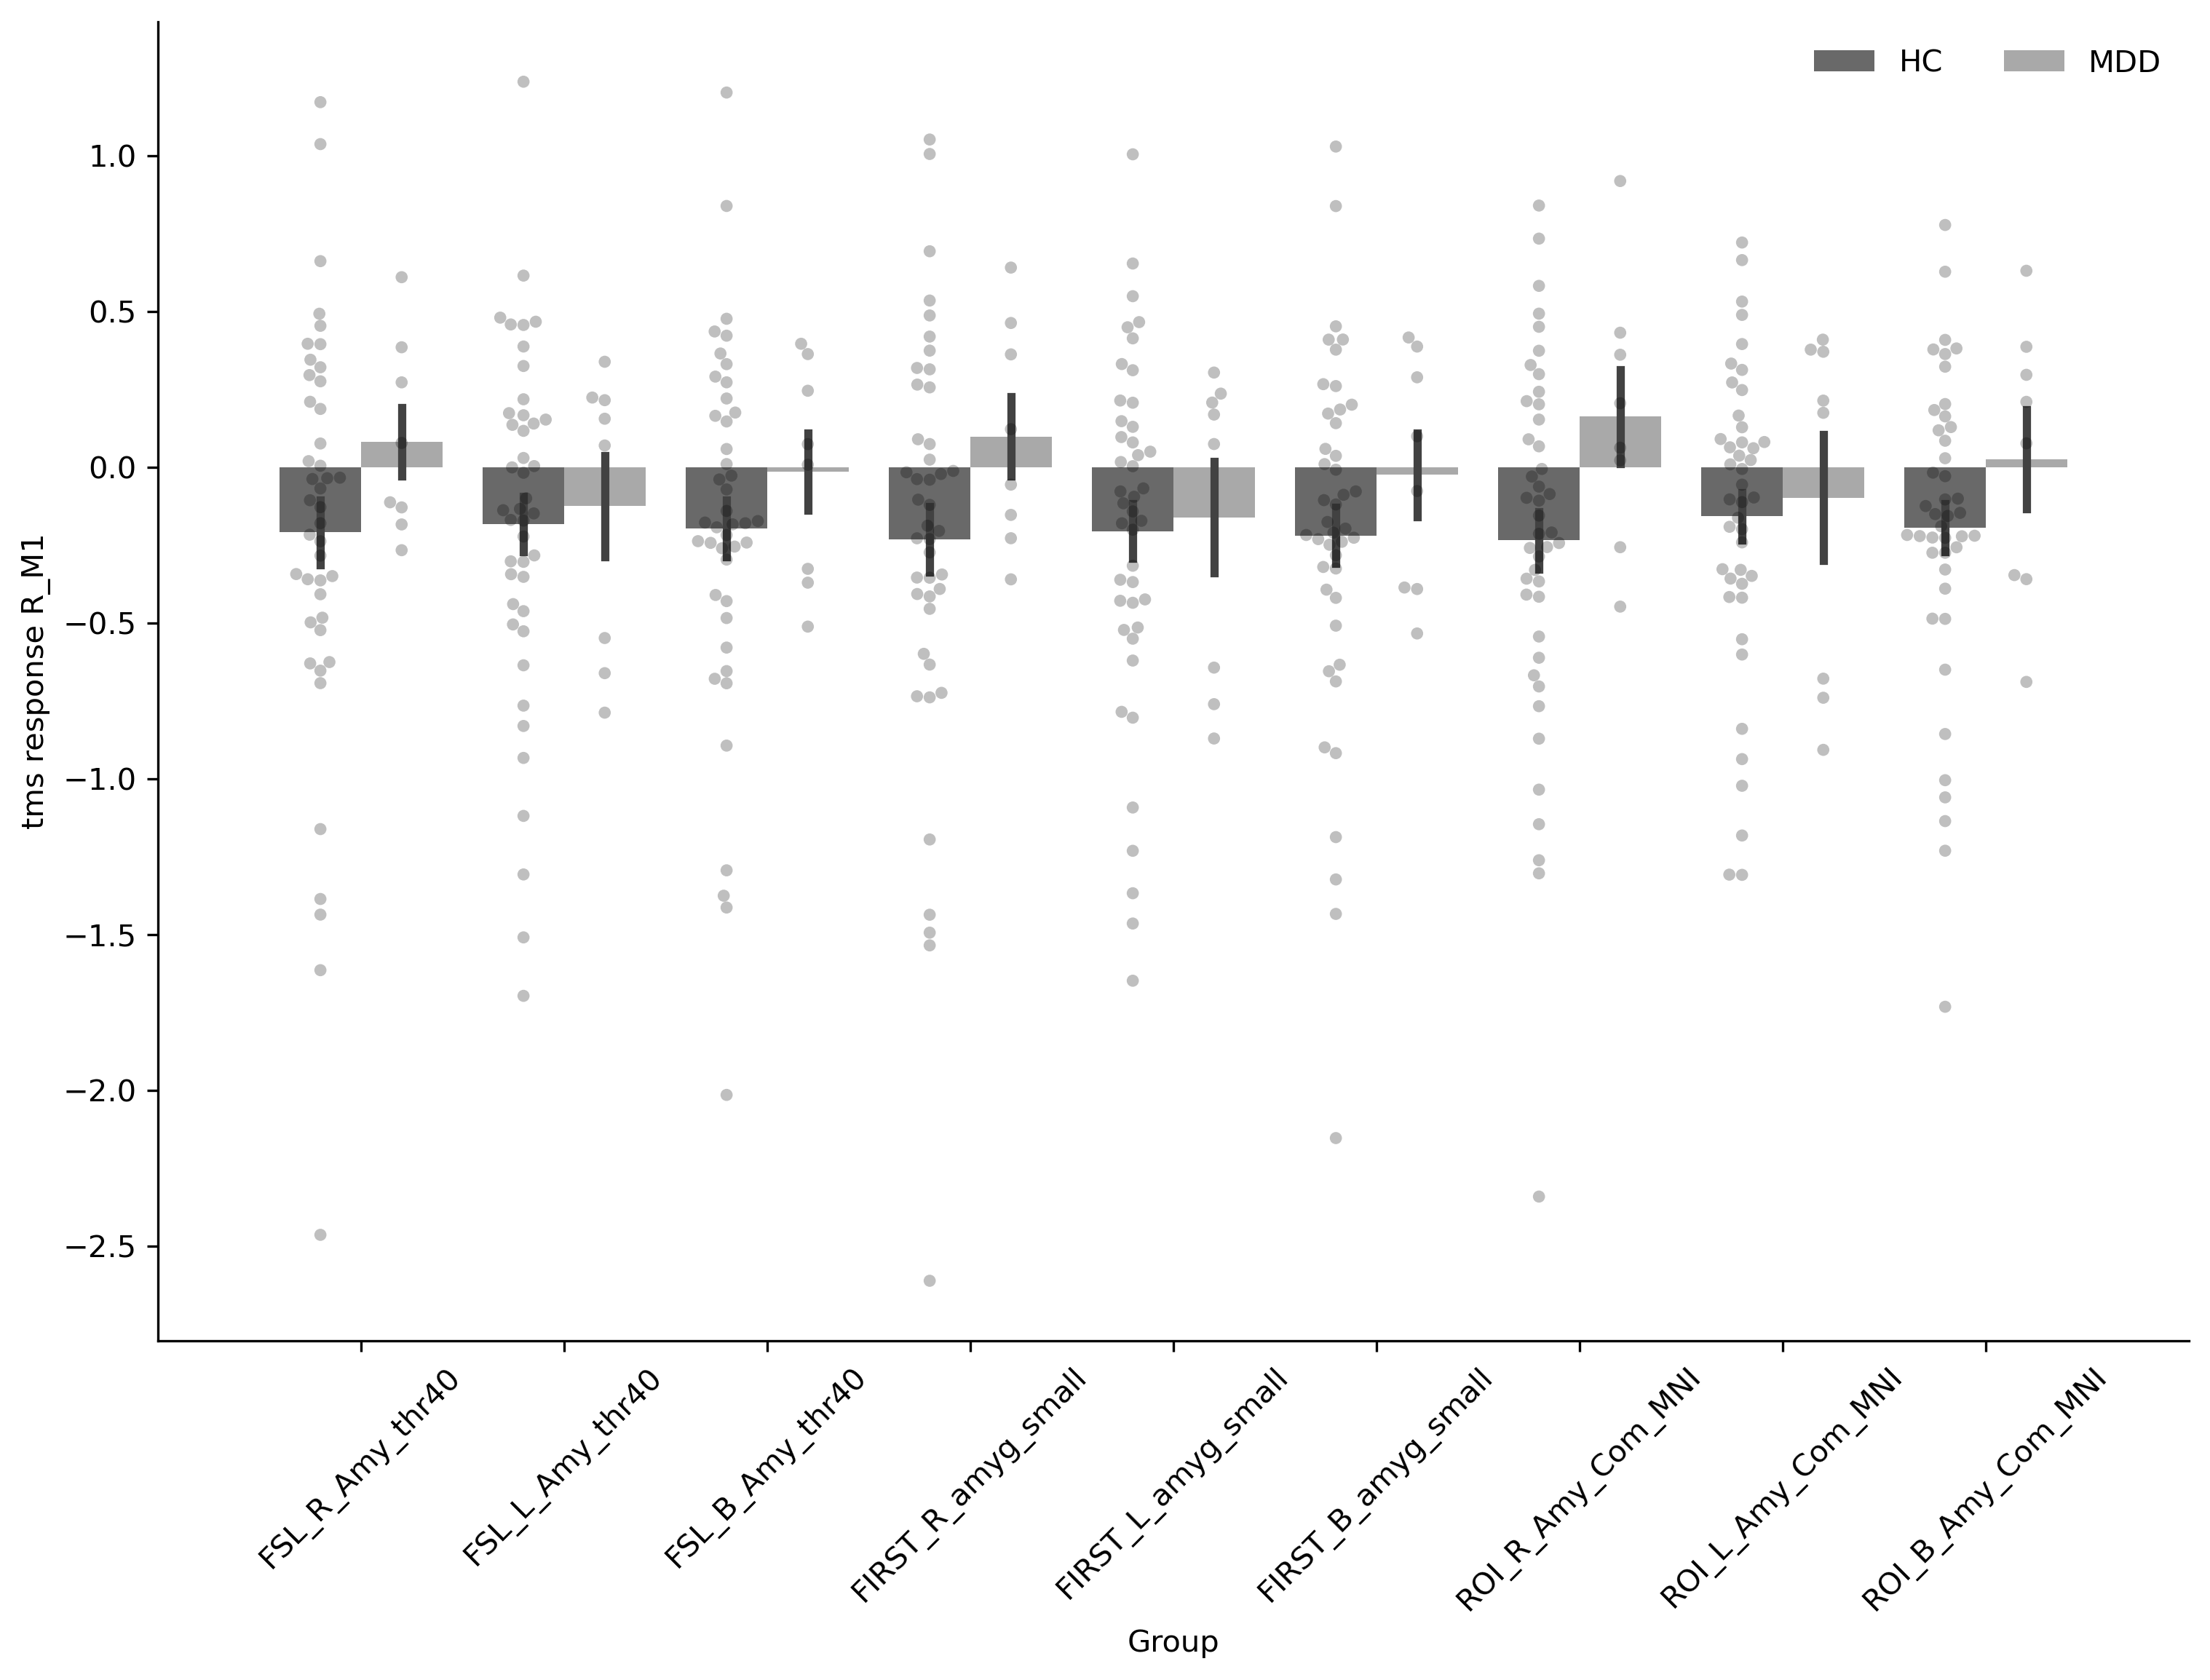

In [19]:
ylabel = "tms response R_M1"
plot_data1 = plot_data.loc[plot_data['site']=="R_M1", :]
fig = make_plot(plot_data1, ylabel)
fig.savefig('out03_' + out_file_prefix + ylabel + '.png')
